# Figures

This notebook is for creating the figures used in the blog post.

In [1]:
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import customer_summary.csv

In [4]:
customer_summary = pd.read_csv('customer_summary.csv')

### Figure 1

Text(0.5, 0, 'No. months as a member')

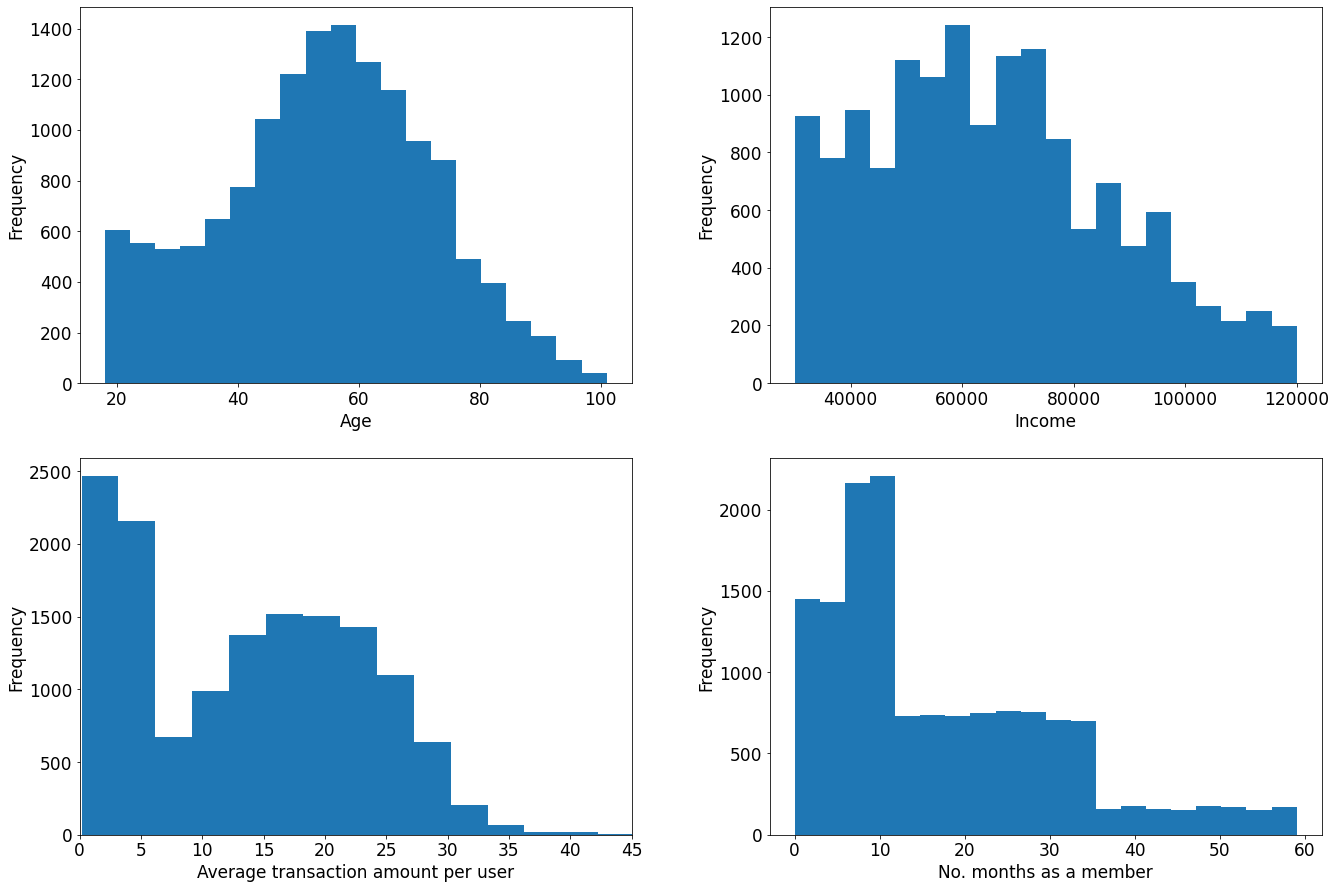

In [23]:
# Visualize the distribution of the age, income, and year of becoming member of the customers
fig, axis = plt.subplots(2, 2)
plt.rc('font', size=17)
plt.subplots_adjust(wspace=0.25, hspace=0.2, top=3, right=3)

ax_1 = customer_summary['age'].plot.hist(ax=axis[0,0], bins=20)
ax_2 = customer_summary['income'].plot.hist(ax=axis[0,1], bins=20)
ax_3 = customer_summary['amount'].plot.hist(ax=axis[1,0], bins=150)
ax_4 = customer_summary['months_since_member'].plot.hist(ax=axis[1,1], bins=20)

ax_1.set_xlabel('Age')
ax_2.set_xlabel('Income')
ax_3.set_xlabel('Average transaction amount per user')
ax_3.set_xlim([0, 45])
ax_4.set_xlabel('No. months as a member')
#fig.suptitle('Distributions of numerical features',x=1.5,y=3.1, fontsize=20)

### Figure 2

(25500.0, 80000.0)

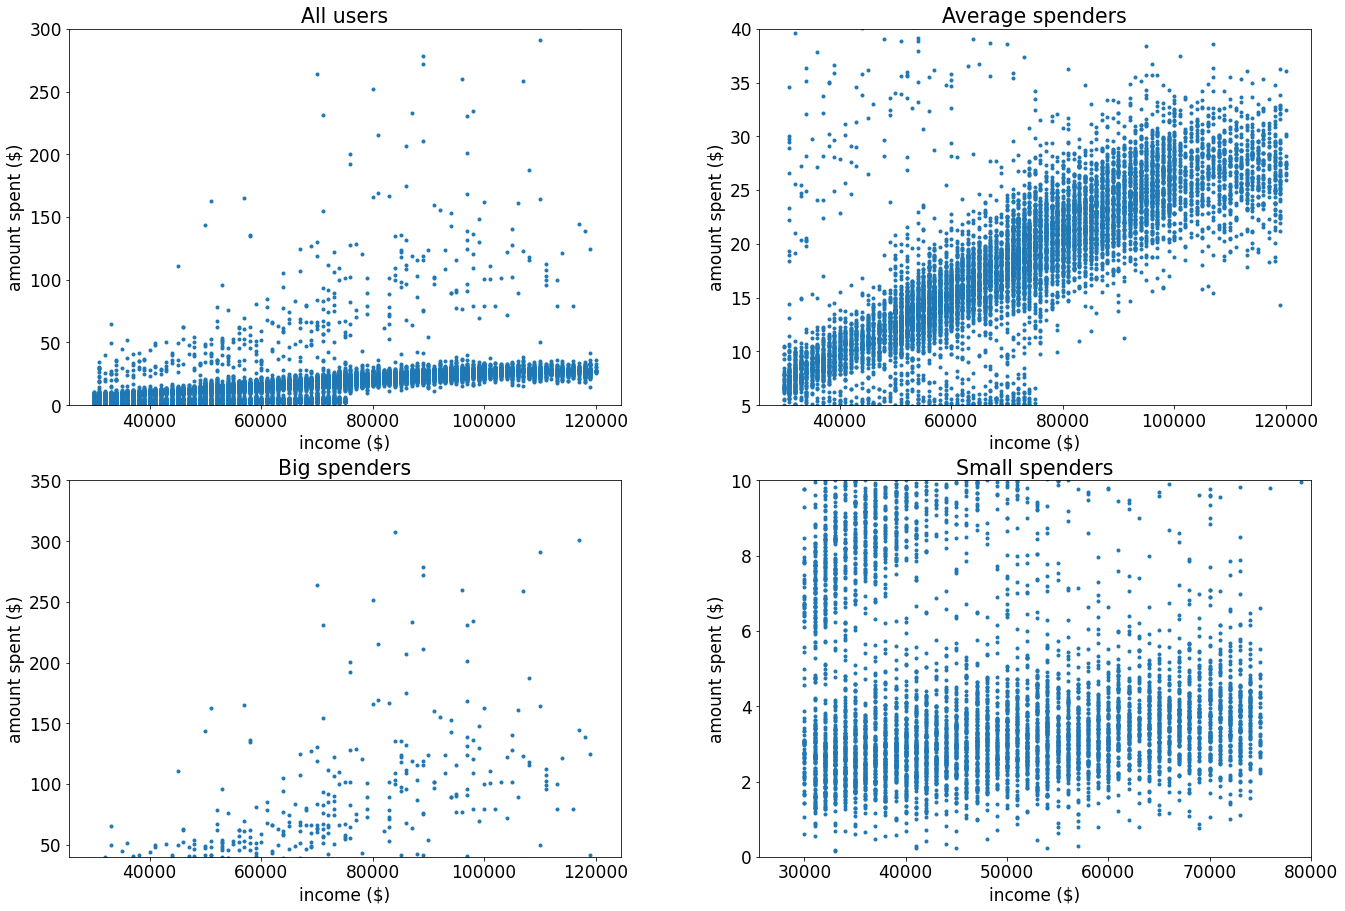

In [25]:
#Figure 2
fig, axis = plt.subplots(2, 2)
plt.rc('font', size=17)
plt.subplots_adjust(wspace=0.25, hspace=0.2, top=3, right=3)
axis[0,0].plot(customer_summary['income'],customer_summary['amount'],'.')
axis[0,0].set_xlabel('income ($)')
axis[0,0].set_ylabel('amount spent ($)')
axis[0,0].set_ylim([0,300])
axis[0,0].set_title('All users')

axis[0,1].plot(customer_summary['income'],customer_summary['amount'],'.')
axis[0,1].set_xlabel('income ($)')
axis[0,1].set_ylabel('amount spent ($)')
axis[0,1].set_title('Average spenders')
axis[0,1].set_ylim([5,40])

axis[1,0].plot(customer_summary['income'],customer_summary['amount'],'.')
axis[1,0].set_xlabel('income ($)')
axis[1,0].set_ylabel('amount spent ($)')
axis[1,0].set_title('Big spenders')
axis[1,0].set_ylim([40,350])

axis[1,1].plot(customer_summary['income'],customer_summary['amount'],'.')
axis[1,1].set_xlabel('income ($)')
axis[1,1].set_ylabel('amount spent ($)')
axis[1,1].set_ylim([0,10])
axis[1,1].set_title('Small spenders')
axis[1,1].set_xlim(right=80000)
#fig.suptitle('Average transaction spend vs. Income',x=1.5,y=1.2, fontsize=20)

### Figure 3

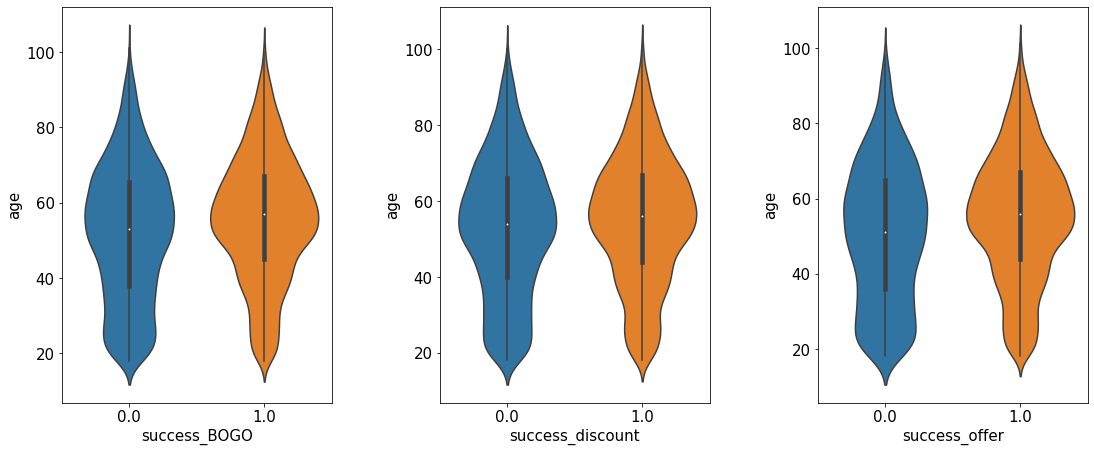

In [58]:
fig, axis = plt.subplots(1, 3)
plt.rc('font', size=15)
plt.subplots_adjust(wspace=0.4, hspace=0.8, top=1.5, right=2.5)

ax_1 = sns.violinplot(y='age', 
                x='success_offer', 
                data=customer_summary,
                ax=axis[2])

ax_2 = sns.violinplot(y='age', 
                x='success_discount', 
                data=customer_summary,
                ax=axis[1])

ax_3 = sns.violinplot(y='age', 
                x='success_BOGO', 
                data=customer_summary,
                ax=axis[0])

#fig.suptitle('Age distributions of offer responders and non-responders',x=1,y=1.1, fontsize=15)

### Figure 4

(0.0, 40.0)

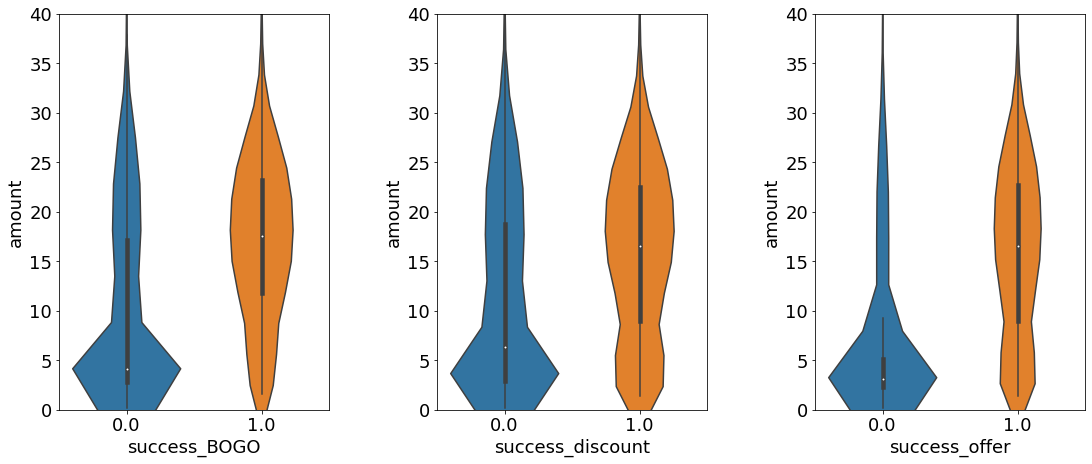

In [57]:
fig, axis = plt.subplots(1, 3)
plt.rc('font', size=15)
plt.subplots_adjust(wspace=0.4, hspace=0.8, top=1.5, right=2.5)

ax_1 = sns.violinplot(y='amount', 
                x='success_offer', 
                data=customer_summary,
                ax=axis[2])

ax_2 = sns.violinplot(y='amount', 
                x='success_discount', 
                data=customer_summary,
                ax=axis[1])

ax_3 = sns.violinplot(y='amount', 
                x='success_BOGO', 
                data=customer_summary,
                ax=axis[0])

#fig.suptitle('Amounts spent by offer responders and non-responders',x=1,y=1.1, fontsize=15)

ax_3.set_ylim([0, 40])
ax_2.set_ylim([0, 40])
ax_1.set_ylim([0, 40])


### Figure 5

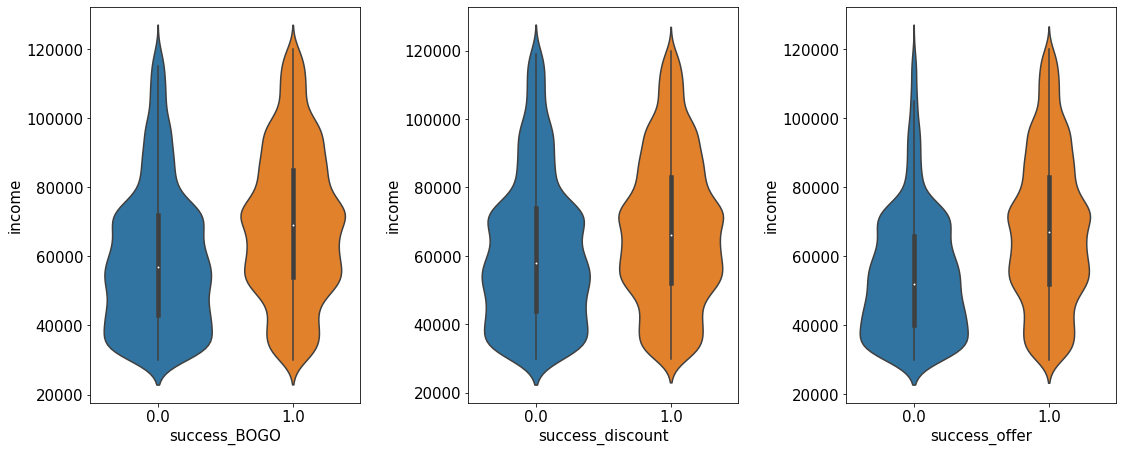

In [59]:
fig, axis = plt.subplots(1, 3)
plt.rc('font', size=15)
plt.subplots_adjust(wspace=0.4, hspace=0.8, top=1.5, right=2.5)

ax_1 = sns.violinplot(y='income', 
                x='success_offer', 
                data=customer_summary,
                ax=axis[2])

ax_2 = sns.violinplot(y='income', 
                x='success_discount', 
                data=customer_summary,
                ax=axis[1])

ax_3 = sns.violinplot(y='income', 
                x='success_BOGO', 
                data=customer_summary,
                ax=axis[0])

#fig.suptitle('Income distributions of offer responders and non-responders',x=1,y=1.1, fontsize=15)


### Figure 6

Text(0.5, 1.0, 'Categorized')

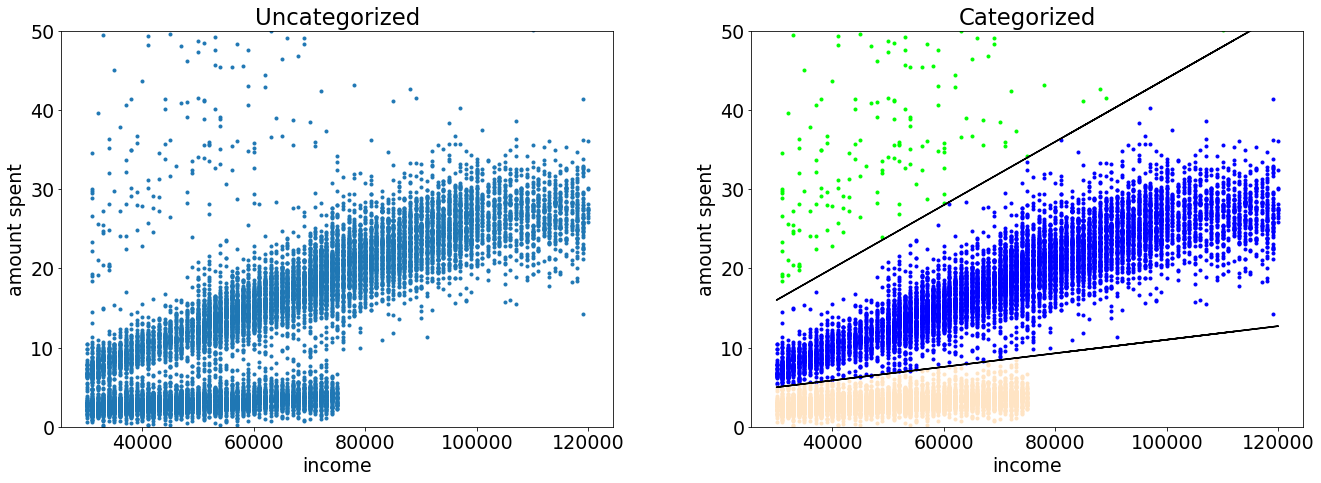

In [63]:
def lin_equ(l1, l2):
    """
        Function for calculating m and c in y=mx+c for two points
        
        Inputs l1, l2: lists or sets of form (x,y)
        Outputs: m & c (float)
    """
    
    m = (l2[1] - l1[1]) / (l2[0] - l1[0])
    c = (l2[1] - (m * l2[0]))
    return m, c

customer_summary['spending_pattern'] = 'A'

#Boundary 1
m1, c1 = lin_equ((30000,16),(90000,40))
customer_summary.loc[customer_summary['amount'] < (m1*customer_summary['income'] + c1),'spending_pattern'] = 'B'

#Boundary 2
m2, c2 = lin_equ((30000,5),(65000,8))
customer_summary.loc[customer_summary['amount'] < (m2*customer_summary['income'] + c2),'spending_pattern'] = 'C'

fig, axis = plt.subplots(1, 2)
plt.rc('font', size=19)
plt.subplots_adjust(wspace=0.25, hspace=0.2, top=1.5, right=3)
axis[0].plot(customer_summary['income'],customer_summary['amount'],'.')
axis[0].set_xlabel('income', fontsize = 19)
axis[0].set_ylabel('amount spent', fontsize = 19)
axis[0].set_ylim([0,50])
axis[0].set_title('Uncategorized')

axis[1].plot(customer_summary[customer_summary['spending_pattern']=='A']['income'],\
             customer_summary[customer_summary['spending_pattern']=='A']['amount'],'.',color='lime')
axis[1].plot(customer_summary[customer_summary['spending_pattern']=='B']['income'],\
             customer_summary[customer_summary['spending_pattern']=='B']['amount'],'.',color='blue')
axis[1].plot(customer_summary[customer_summary['spending_pattern']=='C']['income'],\
             customer_summary[customer_summary['spending_pattern']=='C']['amount'],'.',color='bisque')
axis[1].plot(customer_summary['income'],m2*customer_summary['income'] + c2,'-',color='black')
axis[1].plot(customer_summary['income'],m1*customer_summary['income'] + c1,'-',color='black')
axis[1].set_ylim([0,50])
axis[1].set_xlabel('income', fontsize = 19)
axis[1].set_ylabel('amount spent', fontsize = 19)
axis[1].set_ylim([0,50])
axis[1].set_title('Categorized')

### Figure 7 & 8

This plot was taken directly from the main notebook

### Figure 9


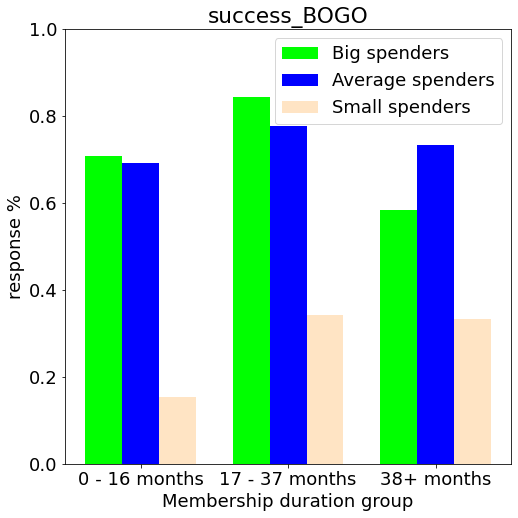

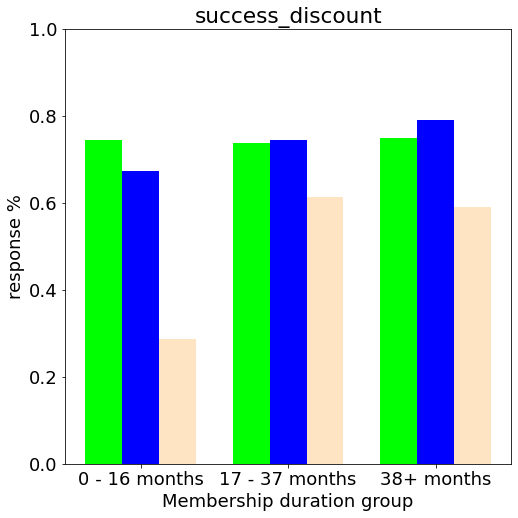

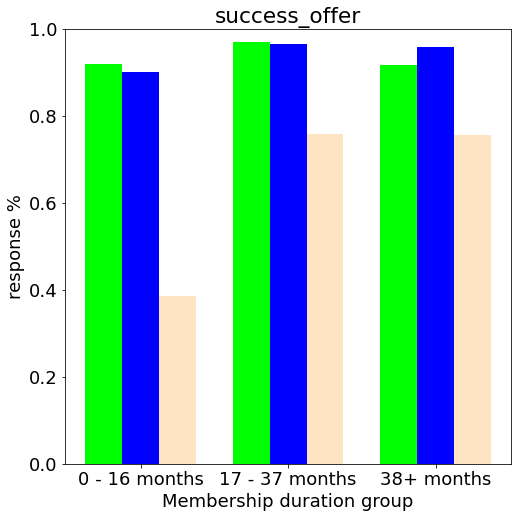

In [56]:
import kmeans1d
k = 3
x = list(customer_summary['months_since_member'])
customer_summary['months_member_cluster'] = kmeans1d.cluster(list(customer_summary['months_since_member']), k)[0]

plt.rc('font', size=18)

for offer_type in ['success_BOGO','success_discount','success_offer']:
    plot_values = np.zeros((3,3))
    for i, months_member_cluster in enumerate([0, 1, 2]):
        for j, spending_pattern in enumerate(['A','B','C']):
            group = customer_summary[(customer_summary['months_member_cluster'] == months_member_cluster ) & \
                                     (customer_summary['spending_pattern'] == spending_pattern)]
            plot_values[i,j] = group[offer_type].sum()/group.shape[0]
    
    plot_group_0 = list(plot_values[:,0])
    plot_group_1 = list(plot_values[:,1])
    plot_group_2 = list(plot_values[:,2])

    # set width of bar 
    barWidth = 0.25
    fig = plt.subplots(figsize =(8, 8)) 
    
    # Set position of bar on X axis 
    br1 = np.arange(len(plot_group_0)) 
    br2 = [x + barWidth for x in br1] 
    br3 = [x + barWidth for x in br2] 
 
    # Make the plot
    plt.bar(br1, plot_group_0, color ='lime', width = barWidth, label ='Big spenders') 
    plt.bar(br2, plot_group_1, color ='blue', width = barWidth, label ='Average spenders') 
    plt.bar(br3, plot_group_2, color ='bisque', width = barWidth,  label ='Small spenders') 
    plt.ylim([0,1])
    
    # Adding Xticks
    plt.xlabel('Membership duration group', fontsize = 18) 
    plt.ylabel('response %', fontsize = 18) 
    plt.xticks([r + barWidth for r in range(len(plot_group_0))], 
            ['0 - 16 months', '17 - 37 months', '38+ months'])
    plt.title(offer_type)
    if offer_type == 'success_BOGO':
        plt.legend()
    plt.show()